# Background
----------

## 1. Mass:
--------
Refers to the amount of matter in the planet, often measured in relation to Earth's mass or Jupiter's mass. 
A planet’s mass affects its gravitational influence and can be inferred from the effects on nearby objects 
or its star.

## 2. Semimajor Axis:
------------------
The semimajor axis is the longest radius of an elliptical orbit. It represents the average distance between 
the planet and its star. It plays a significant role in determining the planet’s orbital characteristics, 
such as period and energy.

## 3. Eccentricity:
----------------
Eccentricity describes how stretched or elliptical the planet’s orbit is. An eccentricity of 0 means 
a perfectly circular orbit, while values closer to 1 indicate more elongated orbits. Eccentricity affects 
how the planet’s distance from its star changes during its orbit.

## 4. Period:
----------
The orbital period is the time it takes for the planet to complete one full orbit around its star. 
It is related to the semimajor axis through Kepler’s Third Law, which states that larger orbits 
(larger semimajor axes) lead to longer periods.

## 5. Periastron Method:
---------------------
This refers to the method used to determine the periastron, which is the point in the planet’s orbit 
where it is closest to the star. Common methods include radial velocity measurements, transit timing,
or astrometry.

## 6. Periastron:
--------------
The periastron is the point in the orbit where the planet is closest to its star. It is important 
for understanding the orbital shape and can influence factors such as the planet's temperature due 
to varying distances from the star throughout its orbit.

## Summary:
--------------
Mass and Period: More massive planets can exert stronger gravitational forces on their stars, which 
can be detected and measured. Additionally, massive planets often have longer periods if they are far 
from their star. Semimajor Axis and Period: The larger the semimajor axis, the longer the orbital period 
(Kepler’s Third Law). Eccentricity and Periastron: Higher eccentricities cause a greater difference between 
the periastron (closest point) and apastron (farthest point). Mass and Eccentricity: In some cases, more 
massive planets tend to have more eccentric orbits due to interactions with other planets or their formation 
history. These parameters together describe the orbital mechanics and gravitational interactions of a planet 
with its star.

In [3]:
# display plots directly within the notebook
%matplotlib inline 

import sys
import warnings

# import third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import MissingIndicator
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns

# import local libraries
from utils.ml.elbow_point import elbow_point

# Disable pandas FutureWarnings coming from matplotlib
warnings.simplefilter(action='ignore', category=FutureWarning)

# override default width of printed output
pd.set_option('display.width', 500)

In [4]:
# read planetary data from file
planets = pd.read_csv('data/planets/planets.csv') # older dataset
planets_u = pd.read_csv('data/planets/planets_updated.csv') # most recent dataset

# rename columns so that the concatenated 
# names are split by an unerscore for better
# readability and consistency
for df in [planets, planets_u]:
    df.rename(
        columns={
        "periastrontime": "periastron_method",
        "semimajoraxis": "semimajor_axis",
        "discoveryyear": "discovery_year",
        "discoverymethod": "discovery_method",
        "lastupdate": "last_update",
        "binaryflag": "binary_flag"
        },
        inplace=True
    )

In [103]:
# investigate the original planetary data
planets.info()
planets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mass               1659 non-null   float64
 1   description        3709 non-null   object 
 2   periastron_method  203 non-null    float64
 3   semimajor_axis     1704 non-null   float64
 4   discovery_year     4083 non-null   float64
 5   list               4094 non-null   object 
 6   eccentricity       1388 non-null   float64
 7   period             3930 non-null   float64
 8   discovery_method   4046 non-null   object 
 9   last_update        4087 non-null   object 
 10  periastron         561 non-null    float64
 11  name               4094 non-null   object 
dtypes: float64(7), object(5)
memory usage: 383.9+ KB


,mass,periastron_method,semimajor_axis,discovery_year,eccentricity,period,periastron
count,1659.000000,2.030000e+02,1704.000000,4083.000000,1388.000000,3930.000000,561.000000
mean,2.702061,2.541145e+06,5.837964,2013.939995,0.159016,524.084969,132.081840
std,8.526177,1.566478e+06,110.668743,6.006576,0.185041,7087.428665,122.343308
min,0.000008,2.452942e+05,0.004420,1781.000000,0.000000,0.090706,-233.000000
25%,0.085000,2.452454e+06,0.051575,2014.000000,0.013000,4.552475,45.000000
50%,0.830000,2.454114e+06,0.140900,2015.000000,0.100000,12.364638,118.258489
75%,2.440000,2.455426e+06,1.190000,2016.000000,0.230000,46.793136,227.005878
max,263.000000,2.453248e+07,3500.000000,2020.000000,0.956000,320000.000000,791.000000


In [104]:
# investigate the correlaion among planetary physical parameters
params = planets[[
    'mass', 'semimajor_axis',
    'eccentricity', 'period',
    'periastron_method', 'periastron'
]]
corr = params.corr(method='pearson') # pearson correlation coefficient

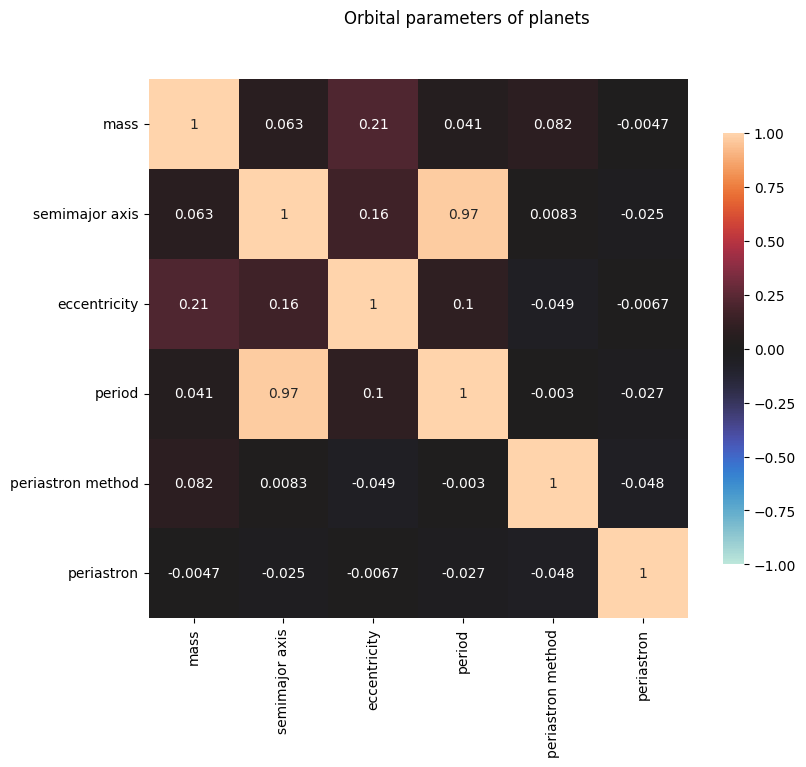

In [105]:
fig = plt.figure(figsize=(9, 7))
plt.suptitle('Orbital parameters of planets')

# replace underscores with spaces in
# parameter names to be used in the plot
for ax in ['index', 'columns']:
  corr.rename(
    lambda x: x.replace('_', ' '),
    axis=ax, inplace=True
  )

heatmap = sns.heatmap(
    corr, 
    annot=True, 
    center=0,
    vmin=-1, # minimum possible correlation coefficient
    vmax=1,  # maximum possible correlation coefficient
    square=True,
    cbar_kws={
        'shrink': 0.8
    }
)
plt.show()

# Results: 
----------
1. The planetary mass exhibits a weak positive correlation with ecentricity (0.21):


2. The eccentricity exhibits as weak positive correlation with semimajor axis (0.16):

3. The planetary mass exhibits weak correlation with period (0.041):
Eccentricity affects how the planet’s distance from its star changes 
during its orbit. The planetary mass generally has direct impact on 
the orbit's shape, although the general interaction is weak, which may
be caused by intergference with another effect (variable), such as speed
of the planet.

4. The eccentricity exhibits weak correlation with period (0.1)

5. The semimajor axis exhibits as strong correlation with period (0.97):
The observation is not surprising, since the semimajor axis plays a significant 
role in determining the planet’s orbital characteristics, such as period and energy.



Zi = wi, 1X1 + wi, 2X2

					Loadings
    semimajor_axis  eccentricity  period  periastron_method  periastron
1           0.704         0.105   0.703             -0.005      -0.020
2           0.024        -0.381   0.025              0.804      -0.456
3           0.057        -0.698   0.068              0.067       0.708
4          -0.021         0.597  -0.048              0.591       0.539
5           0.708        -0.017  -0.706             -0.010      -0.005


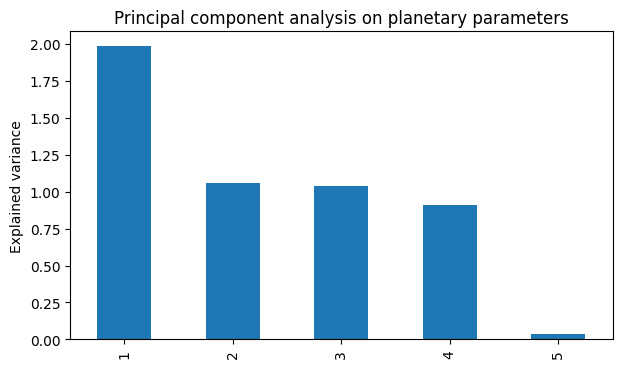

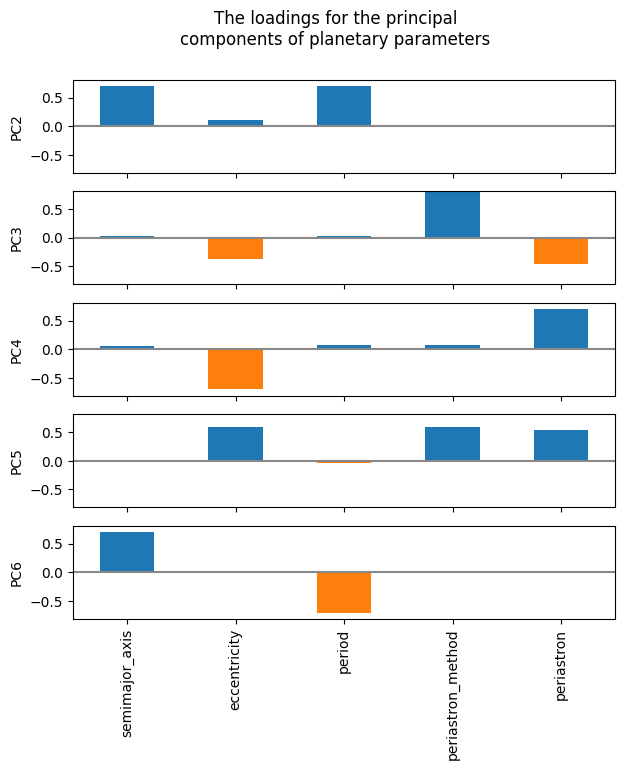

In [139]:
# now that we know that the predictors correlate amoung themselves, let's perform
# principal component analysis (PCA) to discover the wayin wich they covary.
params_pca = planets[[
    'semimajor_axis',
    'eccentricity', 'period',
    'periastron_method', 'periastron'
]].dropna()

# since the parameters differ by magnitudes of ten
# we need to normalize the values before fitting to PCA
scaler = StandardScaler()
params_norm = scaler.fit_transform(params_pca)

# now fpeform PCA on the scaled data
pca = PCA(n_components=params_pca.shape[1])
pca.fit(params_norm)

# extract loadings (weights) for components
loadings = pd.DataFrame(pca.components_, columns=params_pca.columns)
loadings.index = loadings.index + 1
loadings = loadings.apply(lambda x: round(x, 3))

loadings.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)
print('\t'*5 + 'Loadings\n', loadings)

# extract explained variance of components
explained_variance = pd.DataFrame(pca.explained_variance_)
explained_variance.index = explained_variance.index + 1

# Plot the explained variance into a bar graph.
# The underscores discard the returned ax values
# and prevend them from being accidentally outputted.
ax = explained_variance.plot.bar(legend=False, figsize=(7, 4))
_ = ax.set_title('Principal component analysis on planetary parameters')
_ = ax.set_ylabel('Explained variance')

maxPC = 1.01 * np.max(np.max(np.abs(loadings)))
fig, axes = plt.subplots(5, 1, figsize=(7, 7), sharex=True)
fig.suptitle('The loadings for the principal\ncomponents of planetary parameters')

for i, ax in enumerate(axes, start = 1):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

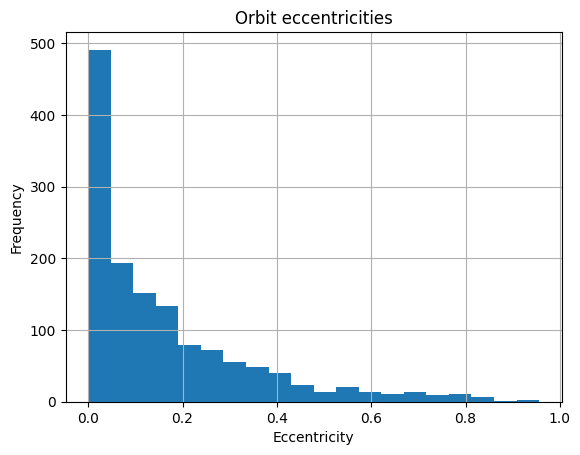

In [5]:
planets.eccentricity.hist(bins=20)
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.title('Orbit eccentricities')
plt.show()

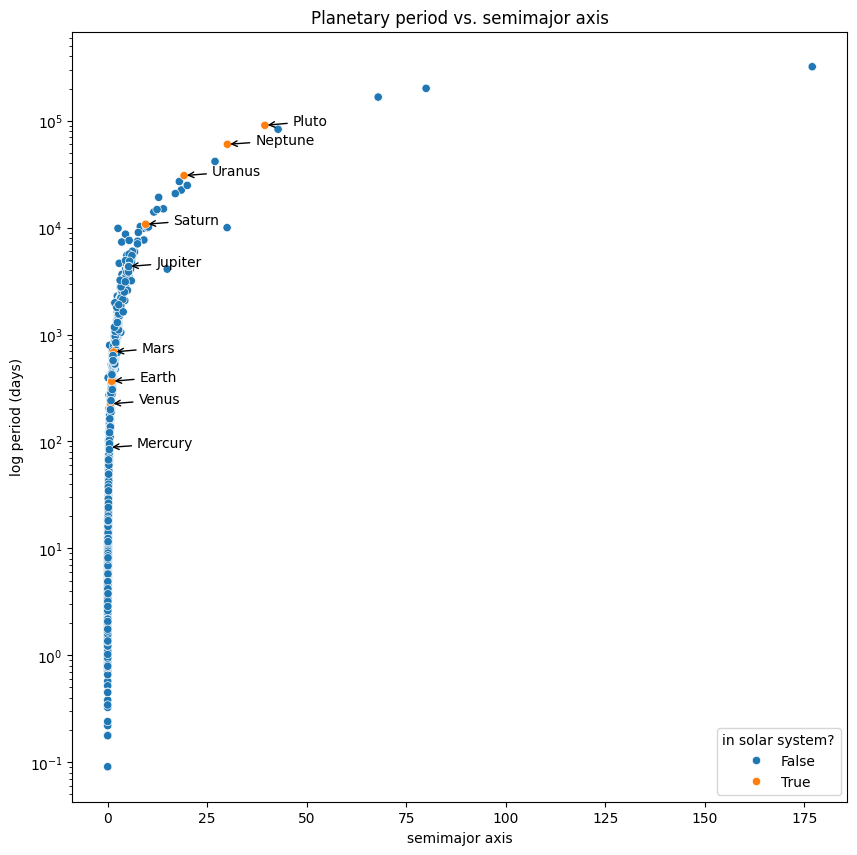

In [12]:
# investigate the relationshop between the strongest correlated parameters
# semimajor axis and period, these parameters may be erlated to the origin
# of the planets - some come from a Solar System, others from other systems
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
in_solar_system = planets.list == 'Solar System'

scatter = sns.scatterplot(
  x=planets.semimajor_axis,
  y=planets.period, 
  hue=in_solar_system,
  ax=ax
)

ax.set_xlabel('semimajor axis')
ax.set_ylabel('log period (days)')
ax.set_yscale('log')

solar_system = planets[planets.list == 'Solar System']

for planet in solar_system.name:
  data = solar_system.query(f'name == "{planet}"')
  ax.annotate(
    planet,
    (data.semimajor_axis, data.period),
    (7 + data.semimajor_axis, data.period),
    arrowprops=dict(arrowstyle='->')
  )

ax.set_title('Planetary period vs. semimajor axis')
plt.legend(title='in solar system?', loc='lower right')
plt.show()

There's a nonlinear relationship between the semimajor axis and planetary period.

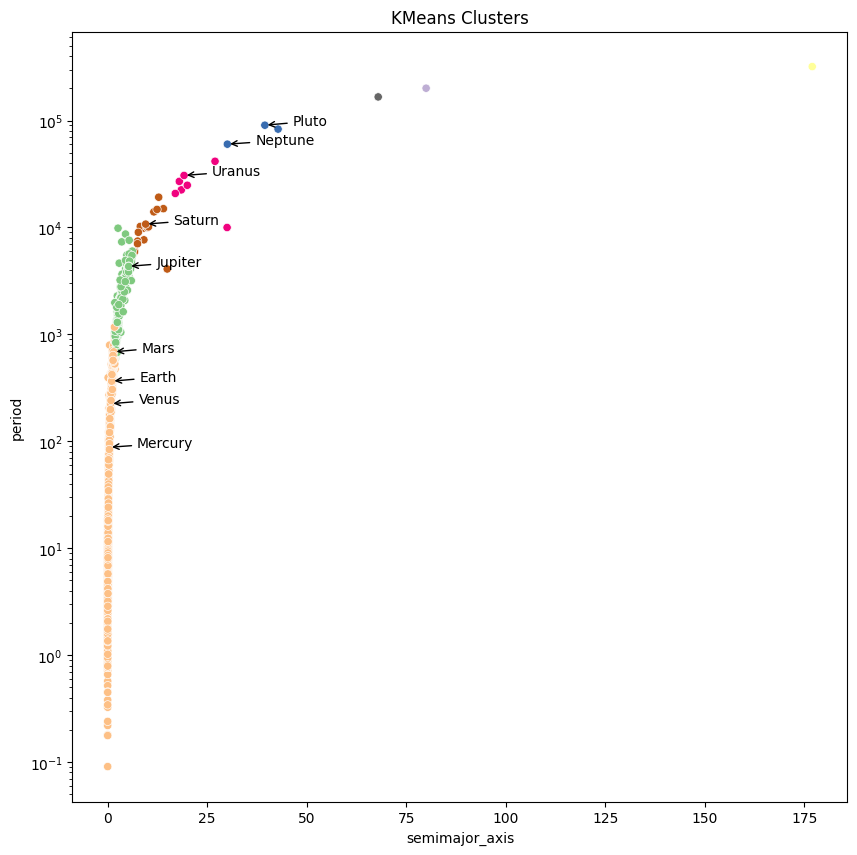

In [7]:
# prep data for KMeans analysis
x = planets[['eccentricity', 'semimajor_axis', 'mass']] # independent feats?
y = planets['period'] # dependent feats

x_train, x_test, y_train, y_test = train_test_split(
  x, y,
  test_size=0.25, # ideally between 10-30% of the data
  random_state=0  # for reproducibility of shuffling
)

# NOTE: in big data scenarios, there will most likely be used 
# much less than 70% of it for training because the computational
# costs may rise significantly for possibly minuscule improvements 
# and an increased risk of overfitting

# normalize the data using Z-score normalization;
# alternatively, the RobustScaler class, which uses the
# median and IQR (robust to outliers) scaling can be used
x_train_norm = StandardScaler().fit_transform(x_train)
x_test_norm = StandardScaler().fit_transform(x_test)

# one-hot encode the list column, but drop the first column
# to avoid collinearity - the values in the remaining ones 
# can be used to determine the value for the removed column
dummies = pd.get_dummies(planets.list, drop_first=True)

missing_flags = MissingIndicator().fit_transform(
  planets[['semimajor_axis', 'mass', 'eccentricity']]
)

grp_data = planets[['semimajor_axis', 'period']].dropna()
n_clusters = 8 
# NOTE: the number of clusters is experimental only, without 
# any domain kowledege it is hard to determine the optimal
# number of clusters; the Elbow method can be used to determine
# the optimal number of clusters, but it is not always accurate.
# In this case, the number of clusters was selected to be equal 
# to the number of planets in the Solar System.

pipeline = Pipeline([
  ('scale', StandardScaler()),
  ('kmeans', KMeans(n_clusters, random_state=0)),
])

pipeline.fit(grp_data)
prediction = pipeline.predict(grp_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(
  x='semimajor_axis', y='period',
  hue=prediction,
  data=grp_data, ax=ax,
  palette='Accent'
)
ax.set_yscale('log')

solar_system = planets[planets.list == 'Solar System']

for planet in solar_system.name:
  data = solar_system.query(f'name == "{planet}"')
  ax.annotate(
  planet,
  (data.semimajor_axis, data.period),
  (7 + data.semimajor_axis, data.period),
  arrowprops=dict(arrowstyle='->')
)
  
ax.get_legend().remove()
ax.set_title('KMeans Clusters')
plt.show()


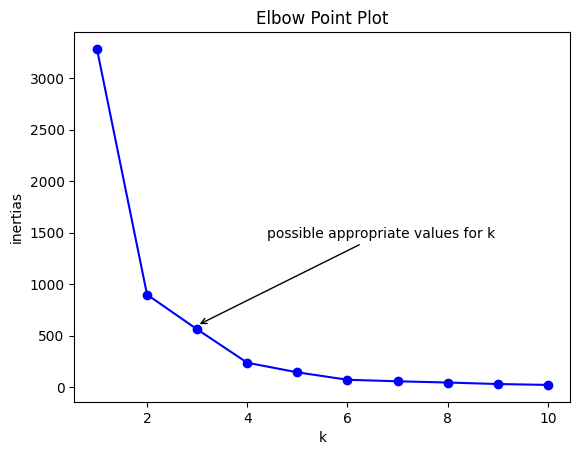

In [18]:
# from the experimental clustering we can see that the number of
# clusters is not optimal, as the planets in the Solar System are
# not clustered together; we can try the Elbow method to determine
# the optimal number of clusters and check the result in a scatterplot
ax = elbow_point(grp_data, pipeline)
ax.annotate(
  'possible appropriate value for k', xy=(3, 600),
  xytext=(4.4, 1450), arrowprops=dict(arrowstyle='->')
)
plt.show()

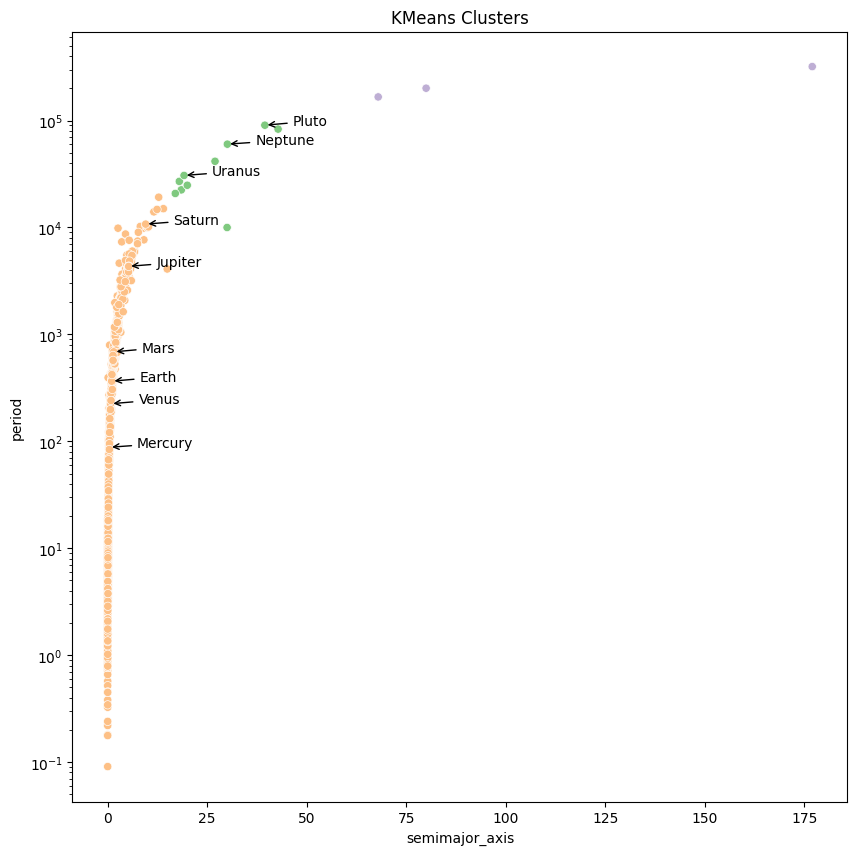

In [18]:
# the Elbow method suggests that the optimal number of 
# clusters is 3 so let's try to cluster the planets again
n_clusters = 3

pipeline = Pipeline([
  ('scale', StandardScaler()),
  ('kmeans', KMeans(n_clusters, random_state=0)),
])
pipeline.fit(grp_data)
prediction = pipeline.predict(grp_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(
  x='semimajor_axis', y='period',
  hue=prediction,
  data=grp_data, ax=ax,
  palette='Accent'
)
ax.set_yscale('log')

solar_system = planets[planets.list == 'Solar System']

for planet in solar_system.name:
  data = solar_system.query(f'name == "{planet}"')
  ax.annotate(
  planet,
  (data.semimajor_axis, data.period),
  (7 + data.semimajor_axis, data.period),
  arrowprops=dict(arrowstyle='->')
)

ax.get_legend().remove()
ax.set_title('KMeans Clusters')
plt.show()